In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import re
import matplotlib.pyplot as plt
import plotly.express as px
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

## if you don't know how to install any of these, usually pip install (name of library) will work. If not, google solutions. All libraries are less than ~25MB.



# Spending Analysis Report

This script is designed to provide a comprehensive overview of annual spending. In place of `bk_download.csv` put the path to a csv export file from your bank account. Columns should be named `Date`, `Description`, `Original Description`(optional), `Category`(optional), `Amount`, and `Status`. If needed reassign your csv column names to match these in the empty cell below:

In [2]:
Budgeting_df = pd.read_csv('bk_download.csv')
#Reassign Column names here by uncommenting.
# Budgeting_df['Date'] = Budgeting_df['']                       ## Date of transaction, stylized (as a string) as YYYY-MM-DD
# Budgeting_df['Description'] = Budgeting_df['']                ## General description (might be stylized as 'Transfer to Venmo' or 'McDonalds')
# Budgeting_df['Original Description'] = Budgeting_df['']       ## More specific description. Might be stylized closer to to 'CHIPOTLE ONLINE 949-524-4000 CA' or just generally more specific
# Budgeting_df['Category'] = Budgeting_df['']                   ## Category of Spending (i.e. Entertainment, Restaurants, etc.)
# Budgeting_df['Amount'] = Budgeting_df['']                     ## Amount of each transaction; negative or positive float value
# Budgeting_df['Status'] = Budgeting_df['']                     ## Status of transaction. This column is OPTIONAL.


In [3]:
display(Budgeting_df)
display(Budgeting_df.dtypes)

,Date,Description,Original Description,Category,Amount,Status
0,2024-01-02,VENMO PAYMENT ***********5347,VENMO PAYMENT ***********5347,Category Pending,-269.39,Pending
1,2024-01-02,VENMO CASHOUT ***********2672,VENMO CASHOUT ***********2672,Category Pending,41.00,Pending
2,2024-01-02,VENMO CASHOUT ***********1522,VENMO CASHOUT ***********1522,Category Pending,435.00,Pending
3,2023-12-29,El Limon,EL LIMON - NORRISTOWN NORRISTOWN PA,Restaurants,-13.78,Posted
4,2023-12-28,Benchmark Climbing,FSP*BENCHMARK CLIMBING 510-973-0335 CA,Entertainment,-85.00,Posted
...,...,...,...,...,...,...
338,2023-01-10,Chipotle,CHIPOTLE ONLINE 949-524-4000 CA,Fast Food,-31.54,Posted
339,2023-01-09,Starbucks,STARBUCKS 71218 3400708 CRANBURY NJ,Coffee Shops,-10.02,Posted
340,2023-01-06,Transfer from Venmo,VENMO CASHOUT ***********3413,Transfer,380.00,Posted
341,2023-01-03,Berkeley Ironworks Touchstonca,BERKELEY IRONWORKS WWW.TOUCHSTONCA,Entertainment,-85.00,Posted


Date                     object
Description              object
Original Description     object
Category                 object
Amount                  float64
Status                   object
dtype: object

The below cell will find all values from the chosen year. Adjust the `2023` parameter in the first line to be the year of choice.

In [4]:
Budgeting_df_annual = Budgeting_df[Budgeting_df['Date'].str.contains('2023')]
Budgeting_df_annual['Month'] = Budgeting_df_annual['Date'].str.extract(r'-(\d{2})-').astype(int)
Budgeting_df_annual['Expenditure'] = Budgeting_df_annual['Amount'] < 0
Budgeting_df_annual

,Date,Description,Original Description,Category,Amount,Status,Month,Expenditure
3,2023-12-29,El Limon,EL LIMON - NORRISTOWN NORRISTOWN PA,Restaurants,-13.78,Posted,12,True
4,2023-12-28,Benchmark Climbing,FSP*BENCHMARK CLIMBING 510-973-0335 CA,Entertainment,-85.00,Posted,12,True
5,2023-12-28,Reach Climbing,REACH CLIMBING 154-13165747 PA,Entertainment,-20.00,Posted,12,True
6,2023-12-26,Transfer to Venmo,VENMO PAYMENT ***********0502,Transfer,-32.97,Posted,12,True
7,2023-12-26,Crate & Barrel,CRATE & BARREL #631 20 KING OF PRUSSPA,Furnishings,-51.67,Posted,12,True
...,...,...,...,...,...,...,...,...
338,2023-01-10,Chipotle,CHIPOTLE ONLINE 949-524-4000 CA,Fast Food,-31.54,Posted,1,True
339,2023-01-09,Starbucks,STARBUCKS 71218 3400708 CRANBURY NJ,Coffee Shops,-10.02,Posted,1,True
340,2023-01-06,Transfer from Venmo,VENMO CASHOUT ***********3413,Transfer,380.00,Posted,1,False
341,2023-01-03,Berkeley Ironworks Touchstonca,BERKELEY IRONWORKS WWW.TOUCHSTONCA,Entertainment,-85.00,Posted,1,True


## Annual Monthly Net Losses and Gains 

In [5]:
Budgeting_df_annual[['Month', 'Amount', 'Expenditure']].groupby(['Month', 'Expenditure']).sum()

Amount
Month Expenditure         
1     False        1645.05
      True         -528.46
2     False         100.01
      True         -588.07
3     False         283.78
      True         -750.52
4     False         332.85
      True         -337.11
5     False         278.10
      True         -458.77
6     False        2840.99
      True         -123.49
7     False        3966.09
      True        -1858.48
8     False        2364.24
      True         -556.47
9     False         668.40
      True        -1904.47
10    False         238.30
      True         -719.27
11    False          86.45
      True         -637.63
12    False           0.04
      True         -634.14

Get a look at the most commonly appearing statements:

In [6]:
Budgeting_df_annual['Description'].value_counts().head(20)

Description
Transfer to Venmo               35
Gig Car Share Gigcca            26
Transfer from Venmo             17
Amazon                          12
365 Retail Markets              10
Berkeley Ironworks               9
Safeway                          8
Interest Paid                    7
ATM Fee Rebate                   7
CSC Service Works                6
Efector Inc Direct Deposit       6
Wawa                             6
Chipotle                         6
Walgreens                        6
Benchmark Climbing               5
Air Canada                       4
Amazon Prime Membership          4
SEPTA                            4
Snack Boba Ninja Snackpassca     4
Raleighs Mezzo                   3
Name: count, dtype: int64

If you have any suspicious or confusing commonly appearing statements, replace `"365 Retail Markets"` with the description to see more info:

In [7]:
Budgeting_df_annual[Budgeting_df_annual['Description'] == '365 Retail Markets']

,Date,Description,Original Description,Category,Amount,Status,Month,Expenditure
142,2023-07-26,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-1.79,Posted,7,True
144,2023-07-24,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-2.59,Posted,7,True
147,2023-07-19,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-2.49,Posted,7,True
153,2023-07-07,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-2.59,Posted,7,True
165,2023-07-03,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-6.44,Posted,7,True
168,2023-06-29,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-6.44,Posted,6,True
175,2023-06-20,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-2.29,Posted,6,True
176,2023-06-16,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-2.49,Posted,6,True
177,2023-06-14,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-2.85,Posted,6,True
180,2023-06-08,365 Retail Markets,365 MARKET 888 432-3299 TROY MI,Fast Food,-6.14,Posted,6,True


It can be useful to know what statements are to and from venmo, as they can require separate accounting and in many cases are opten not representative of personal spending trends (i.e. if you are transferring someone else's money via venmo, or if you're moving money between accounts). The cell below will categorize these via One-hot-encoding. 

If you use Zelle or Paypal, find how those are recorded in your bank statements, and replace the 'Transfer to Venmo' with the description.

In [8]:
Budgeting_df_annual['Transfer to Venmo'] = Budgeting_df_annual['Description'] == 'Transfer to Venmo'
Budgeting_df_annual['Transfer from Venmo'] = Budgeting_df_annual['Description'] == 'Transfer from Venmo'
Budgeting_df_annual

,Date,Description,Original Description,Category,Amount,Status,Month,Expenditure,Transfer to Venmo,Transfer from Venmo
3,2023-12-29,El Limon,EL LIMON - NORRISTOWN NORRISTOWN PA,Restaurants,-13.78,Posted,12,True,False,False
4,2023-12-28,Benchmark Climbing,FSP*BENCHMARK CLIMBING 510-973-0335 CA,Entertainment,-85.00,Posted,12,True,False,False
5,2023-12-28,Reach Climbing,REACH CLIMBING 154-13165747 PA,Entertainment,-20.00,Posted,12,True,False,False
6,2023-12-26,Transfer to Venmo,VENMO PAYMENT ***********0502,Transfer,-32.97,Posted,12,True,True,False
7,2023-12-26,Crate & Barrel,CRATE & BARREL #631 20 KING OF PRUSSPA,Furnishings,-51.67,Posted,12,True,False,False
...,...,...,...,...,...,...,...,...,...,...
338,2023-01-10,Chipotle,CHIPOTLE ONLINE 949-524-4000 CA,Fast Food,-31.54,Posted,1,True,False,False
339,2023-01-09,Starbucks,STARBUCKS 71218 3400708 CRANBURY NJ,Coffee Shops,-10.02,Posted,1,True,False,False
340,2023-01-06,Transfer from Venmo,VENMO CASHOUT ***********3413,Transfer,380.00,Posted,1,False,False,True
341,2023-01-03,Berkeley Ironworks Touchstonca,BERKELEY IRONWORKS WWW.TOUCHSTONCA,Entertainment,-85.00,Posted,1,True,False,False


Use the below pivot table to identify your spending trends independently of the venmos that were sent.

In [9]:
Budgeting_df_annual[['Amount', 'Month', 'Expenditure', 'Transfer to Venmo', 'Transfer from Venmo']].groupby(['Month', "Expenditure", 'Transfer from Venmo']).sum()

Amount  Transfer to Venmo
Month Expenditure Transfer from Venmo                            
1     False       False                  23.75                  0
                  True                 1621.30                  0
      True        False                -528.46                  3
2     False       False                   0.01                  0
                  True                  100.00                  0
      True        False                -588.07                  3
3     False       False                  55.75                  0
                  True                  228.03                  0
      True        False                -750.52                  5
4     False       True                  332.85                  0
      True        False                -337.11                  7
5     False       False                   3.00                  0
                  True                  275.10                  0
      True        False                -458.77                  2
6     False       False                2580.61                  0
                  True                  260.38                  0
      True        False                -123.49                  0
7     False       False                3966.09                  0
      True        False               -1858.48                  3
8     False       False                2080.36                  0
                  True                  283.88                  0
      True        False                -556.47                  0
9     False       False                  42.30                  0
                  True                  626.10                  0
      True        False               -1904.47                  2
10    False       False                   0.05                  0
                  True                  238.25                  0
      True        False                -719.27                  4
11    False       False                  46.45                  0
                  True                   40.00                  0
      True        False                -637.63                  4
12    False       False                   0.04                  0
      True        False                -634.14                  2

Here is monthly Expenditures. One-hot encode other variables if you wish to see more detail in the breakdown.

Month
1     -528.46
2     -588.07
3     -750.52
4     -337.11
5     -458.77
6     -123.49
7    -1858.48
8     -556.47
9    -1904.47
10    -719.27
11    -637.63
12    -634.14
Name: Amount, dtype: float64

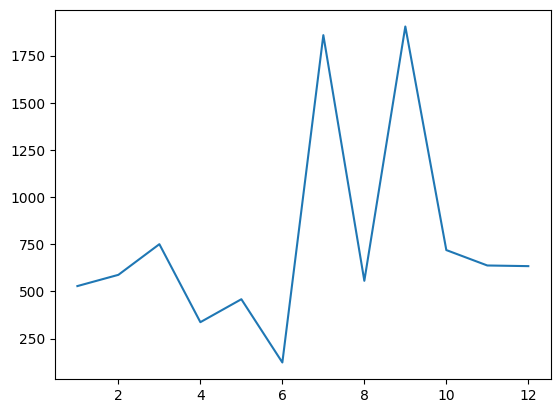

In [10]:
Monthly_Exp_df = Budgeting_df_annual[['Amount', 'Month', 'Expenditure']][Budgeting_df_annual['Expenditure'] == True].groupby('Month').sum()
display(Monthly_Exp_df['Amount'])
plt.plot(Monthly_Exp_df['Amount'] * -1)

It can be helpful to identify spending trends on a more granular basis, the following cell encodes each statement into a week of the year.

In [11]:
Budgeting_df_annual['Week'] = Budgeting_df_annual['Date'].apply(lambda x: (datetime.strptime(x, '%Y-%m-%d') - datetime.strptime('2023-01-01', '%Y-%m-%d')).days // 7)
Budgeting_df_annual

,Date,Description,Original Description,Category,Amount,Status,Month,Expenditure,Transfer to Venmo,Transfer from Venmo,Week
3,2023-12-29,El Limon,EL LIMON - NORRISTOWN NORRISTOWN PA,Restaurants,-13.78,Posted,12,True,False,False,51
4,2023-12-28,Benchmark Climbing,FSP*BENCHMARK CLIMBING 510-973-0335 CA,Entertainment,-85.00,Posted,12,True,False,False,51
5,2023-12-28,Reach Climbing,REACH CLIMBING 154-13165747 PA,Entertainment,-20.00,Posted,12,True,False,False,51
6,2023-12-26,Transfer to Venmo,VENMO PAYMENT ***********0502,Transfer,-32.97,Posted,12,True,True,False,51
7,2023-12-26,Crate & Barrel,CRATE & BARREL #631 20 KING OF PRUSSPA,Furnishings,-51.67,Posted,12,True,False,False,51
...,...,...,...,...,...,...,...,...,...,...,...
338,2023-01-10,Chipotle,CHIPOTLE ONLINE 949-524-4000 CA,Fast Food,-31.54,Posted,1,True,False,False,1
339,2023-01-09,Starbucks,STARBUCKS 71218 3400708 CRANBURY NJ,Coffee Shops,-10.02,Posted,1,True,False,False,1
340,2023-01-06,Transfer from Venmo,VENMO CASHOUT ***********3413,Transfer,380.00,Posted,1,False,False,True,0
341,2023-01-03,Berkeley Ironworks Touchstonca,BERKELEY IRONWORKS WWW.TOUCHSTONCA,Entertainment,-85.00,Posted,1,True,False,False,0


The following cell will then display weekly spending as opposed to monthly, for more specificity in the trends:

Week
0      -90.12
1      -53.56
2     -173.53
3      -89.61
4     -224.46
5      -56.95
6     -244.80
7      -91.01
8     -249.90
9     -115.28
10    -121.26
11     -73.08
12    -283.49
13    -205.16
14     -16.98
15     -81.18
16     -33.79
17    -140.44
18     -83.66
19     -82.31
20     -65.76
21     -86.60
22      -8.25
23     -15.34
24     -84.60
25     -15.30
26   -1669.14
27     -51.16
28     -48.80
29     -89.38
30     -10.00
31    -210.89
32     -16.44
33    -279.11
34    -157.93
35   -1001.37
36    -573.13
37      -9.43
38    -202.64
39    -290.43
40     -78.29
41     -27.15
42    -217.84
43    -115.56
44     -61.16
45    -122.74
46    -222.71
47    -221.02
48     -28.28
49    -213.07
50    -181.37
51    -211.42
Name: Amount, dtype: float64

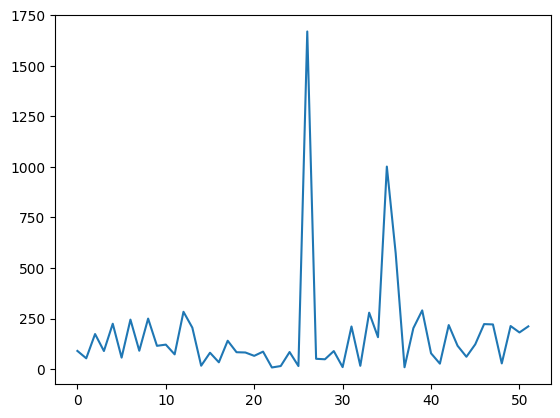

In [12]:
Weekly_Exp_df = Budgeting_df_annual[['Amount', 'Week', 'Expenditure']][Budgeting_df_annual['Expenditure'] == True].groupby('Week').sum()
display(Weekly_Exp_df['Amount'])
plt.plot(Weekly_Exp_df['Amount'] * -1)

The above graph may contain some anomalous weeks. The following cell will help you look for payments that operate outside of typical spending trends and cause these anomalies. 

In [13]:
Budgeting_df_annual.sort_values(by = 'Amount').head(30)

,Date,Description,Original Description,Category,Amount,Status,Month,Expenditure,Transfer to Venmo,Transfer from Venmo,Week
155,2023-07-05,Transfer to Venmo,VENMO PAYMENT ***********6698,Transfer,-1532.40,Posted,7,True,True,False,26
96,2023-09-07,Air Canada,AIR CAN* 0142179738157AIRCANADA.COMMB,Air Travel,-386.06,Posted,9,True,False,False,35
97,2023-09-07,Air Canada,AIR CAN* 0142179738158AIRCANADA.COMMB,Air Travel,-386.06,Posted,9,True,False,False,35
89,2023-09-11,Air Canada,AIR CANADA 0142179736909888-2472262 NY,Air Travel,-213.20,Posted,9,True,False,False,36
88,2023-09-11,Air Canada,AIR CANADA 0142179736908888-2472262 NY,Air Travel,-213.20,Posted,9,True,False,False,36
71,2023-10-02,Zelle Transfer to Tianxi,Zelle: Tianxi,Transfer,-140.00,Posted,10,True,False,False,39
94,2023-09-08,Zelle Transfer to Azhan,Zelle: Azhan,Transfer,-137.91,Posted,9,True,False,False,35
80,2023-09-28,Benchmark,FSP*BENCHMARK CL 1607 SHABERKELEY CA,Entertainment,-135.00,Posted,9,True,False,False,38
16,2023-12-13,Kawa,KAWA CLUB KAWA.CLUB CA,Clothing,-133.08,Posted,12,True,False,False,49
41,2023-11-13,Saul's Restaurant,TST* SAUL'S RESTAURANT ANBERKELEY CA,Restaurants,-118.64,Posted,11,True,False,False,45


### Removing one-time large purchases

To identify more discernable trends in spending, in the following cell, put the indicies of these anomalous statements into the list (inside .drop). This is a good place to remove any instances of transferring someone else's or your own money, and if you feel that it is not reflective of your weekly spending trends, flights and travel. Removing these outlying and anomalous purchases from the data can help reduce the variance they create, leaving behind more useful trends. 

Week
0     -90.12
1     -53.56
2    -173.53
3     -89.61
4    -224.46
5     -56.95
6    -244.80
7     -91.01
8    -249.90
9    -115.28
10   -121.26
11    -73.08
12   -283.49
13   -205.16
14    -16.98
15    -81.18
16    -33.79
17   -140.44
18    -83.66
19    -82.31
20    -65.76
21    -86.60
22     -8.25
23    -15.34
24    -84.60
25    -15.30
26   -136.74
27    -51.16
28    -48.80
29    -89.38
30    -10.00
31   -210.89
32    -16.44
33   -279.11
34   -157.93
35    -91.34
36   -146.73
37     -9.43
38    -67.64
39   -290.43
40    -78.29
41    -27.15
42   -217.84
43   -115.56
44    -61.16
45   -122.74
46   -222.71
47   -221.02
48    -28.28
49   -213.07
50   -181.37
51   -211.42
Name: Amount, dtype: float64

-117.17403846153844

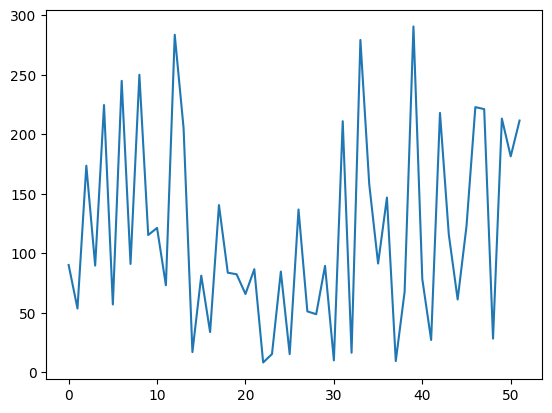

In [14]:
droplist = [155, 96, 97, 89, 88, 94, 80]
Specific_Spend_df = Budgeting_df_annual.drop(droplist)

Weekly_Exp_df = Specific_Spend_df[['Amount', 'Week', 'Expenditure']][Specific_Spend_df['Expenditure'] == True].groupby('Week').sum()
display(Weekly_Exp_df['Amount'])
display(Weekly_Exp_df['Amount'].mean())
plt.plot(Weekly_Exp_df['Amount'] * -1)

### Regularizing the Data

If you find the above plot to be difficult to interpret (Really spikey), it may be because your spending trends are not consistent week by week. I identified that using four-week averages (because months are not consistent length) works well to identify spending trends throughout the year. Using four week averages helps to regularize the data and get a better sense of what the spending trends look like throughout the year as a whole.

,Date,Description,Original Description,Category,Amount,Status,Month,Expenditure,Transfer to Venmo,Transfer from Venmo,Week,4 Week Period,4 Week Period Midpoint
3,2023-12-29,El Limon,EL LIMON - NORRISTOWN NORRISTOWN PA,Restaurants,-13.78,Posted,12,True,False,False,51,13,50
4,2023-12-28,Benchmark Climbing,FSP*BENCHMARK CLIMBING 510-973-0335 CA,Entertainment,-85.00,Posted,12,True,False,False,51,13,50
5,2023-12-28,Reach Climbing,REACH CLIMBING 154-13165747 PA,Entertainment,-20.00,Posted,12,True,False,False,51,13,50
6,2023-12-26,Transfer to Venmo,VENMO PAYMENT ***********0502,Transfer,-32.97,Posted,12,True,True,False,51,13,50
7,2023-12-26,Crate & Barrel,CRATE & BARREL #631 20 KING OF PRUSSPA,Furnishings,-51.67,Posted,12,True,False,False,51,13,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,2023-01-10,Chipotle,CHIPOTLE ONLINE 949-524-4000 CA,Fast Food,-31.54,Posted,1,True,False,False,1,1,2
339,2023-01-09,Starbucks,STARBUCKS 71218 3400708 CRANBURY NJ,Coffee Shops,-10.02,Posted,1,True,False,False,1,1,2
340,2023-01-06,Transfer from Venmo,VENMO CASHOUT ***********3413,Transfer,380.00,Posted,1,False,False,True,0,1,2
341,2023-01-03,Berkeley Ironworks Touchstonca,BERKELEY IRONWORKS WWW.TOUCHSTONCA,Entertainment,-85.00,Posted,1,True,False,False,0,1,2


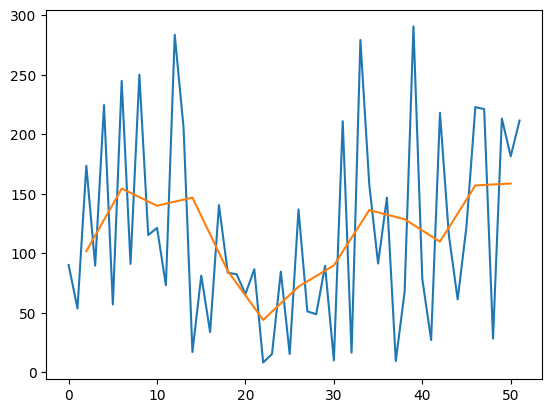

In [15]:
Specific_Spend_df['4 Week Period'] = ((Specific_Spend_df['Week']) // 4) + 1
Specific_Spend_df['4 Week Period Midpoint'] = (Specific_Spend_df['4 Week Period'] * 4) - 2
display(Specific_Spend_df)
QuadWeekly_Exp_df = Specific_Spend_df[['Amount', '4 Week Period Midpoint', 'Expenditure']][Specific_Spend_df['Expenditure'] == True].groupby('4 Week Period Midpoint').sum()

plt.plot(Weekly_Exp_df['Amount'] * -1)
plt.plot(QuadWeekly_Exp_df['Amount'] * -0.25)

## Checking Subscriptions

It's typically good to see what payments are subscription ones, and to see what effect those have on spending patterns. Subscriptions aren't really 'discretionary spending' per say, since we usually keep them for some service that we enjoy regularly. Thus, it is important to analyze how our spending habits appear both before and after subscription payments.

Subscriptions are identified here as any statements of the same amount and description that occurred in distinct months from each other, at least 3 times. What is not counted is statements that are repeated multiple times in the same month, initiation fees for subscriptions, and statements that occur less than 3 times. If there are statements which fit this description but you still deem them to be 'subscriptions', add them above in the anomalous purchases section. 

In [16]:
Recurring_df = Budgeting_df_annual[Budgeting_df_annual.duplicated(subset = ['Original Description', 'Amount'], keep = False)]
Recurring_df['group'] = Recurring_df.groupby(['Original Description', 'Amount']).ngroup()
Recurring_df['Subscription'] = Recurring_df.groupby('group')['Month'].transform(lambda x: x.nunique() == len(x) and len(x) > 2)
sub_inds = Recurring_df[Recurring_df['Subscription'] == True].index

Budgeting_df_annual['Subscription'] = False
Budgeting_df_annual.loc[sub_inds, 'Subscription'] = True


 4 week period subscription spending:


,Amount,Expenditure
4 Week Period Midpoint,,
2,-85.0,1
6,-85.0,1
10,-85.0,1
14,-85.0,1
18,-85.0,1
22,-10.0,1
30,-10.0,1
34,-85.0,1
38,-10.0,1




 Overlay plot:


(0.0, 350.0)

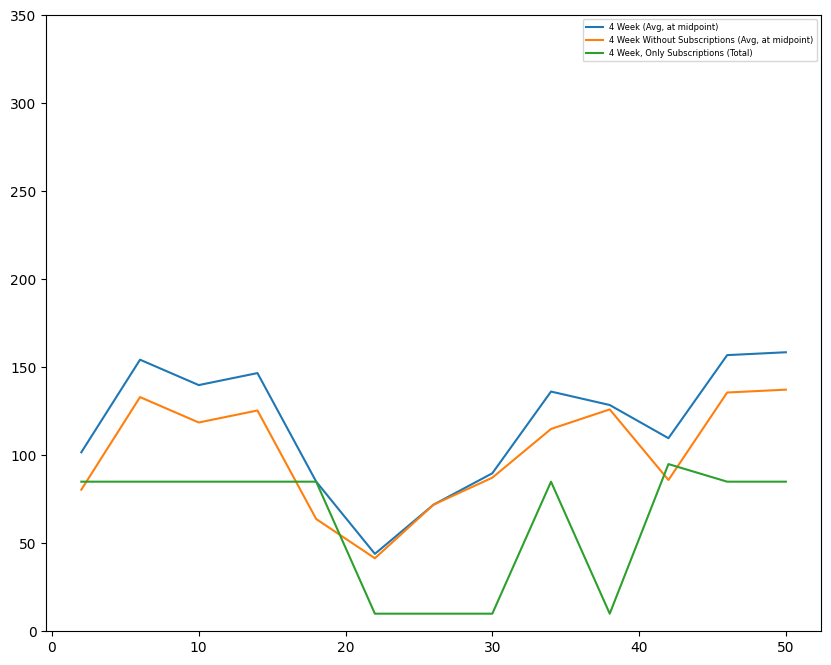

In [17]:
Specific_Spend_df = Budgeting_df_annual.drop(droplist)
Specific_Spend_df['4 Week Period'] = ((Specific_Spend_df['Week']) // 4) + 1
Specific_Spend_df['4 Week Period Midpoint'] = (Specific_Spend_df['4 Week Period'] * 4) - 2

noSub_weekly = Specific_Spend_df[Specific_Spend_df['Subscription'] == False][['Amount', 'Week', 'Expenditure']][Specific_Spend_df['Expenditure'] == True].groupby('Week').sum()
noSub_Quad = Specific_Spend_df[Specific_Spend_df['Subscription'] == False][['Amount', '4 Week Period Midpoint', 'Expenditure']][Specific_Spend_df['Expenditure'] == True].groupby('4 Week Period Midpoint').sum()

Sub_only_4 = Specific_Spend_df[Specific_Spend_df['Subscription'] == True][['Amount', '4 Week Period Midpoint', 'Expenditure']][Specific_Spend_df['Expenditure'] == True].groupby('4 Week Period Midpoint').sum()

print('\n 4 week period subscription spending:')
display(Sub_only_4)

print('\n\n Overlay plot:')
from matplotlib.pyplot import figure
## Uncomment the commented lines to include the weekly overlay

figure(figsize = (10,8))
# plt.plot(Weekly_Exp_df['Amount'] * -1)
plt.plot(QuadWeekly_Exp_df['Amount'] * -0.25)
# plt.plot(noSub_weekly['Amount'] * -1)
plt.plot(noSub_Quad['Amount'] * -0.25)
plt.plot(Sub_only_4['Amount'] * -1)
plt.legend([#'Weekly Totals', 
            '4 Week (Avg, at midpoint)', 
            #'Weekly Without Subscriptions', 
            '4 Week Without Subscriptions (Avg, at midpoint)', 
            '4 Week, Only Subscriptions (Total)'], fontsize = 6)
plt.ylim(0, 350)

## Spending By Category

Now that we can discern subscriptions from discretionary spending, lets stratify the types of spending, to see where our spending tends to fall. We first look at the spending trends on a weekly basis(click each category on the plot to view it):

In [47]:
Strat_wk = Specific_Spend_df[['Amount', 'Week', 'Expenditure', 'Category']][Specific_Spend_df['Expenditure'] == True][Specific_Spend_df['Subscription'] == False].groupby(['Week','Category']).sum().reset_index()

Strat_wk['AmountTotal'] = Strat_wk['Amount'] * -1

category_counts = Strat_wk['Category'].value_counts()
sorted_categories = category_counts.index.tolist()

# Create an interactive line plot using plotly express
fig = px.line(Strat_wk, x='Week', y='AmountTotal', color='Category',
              labels={'AmountTotal': 'Weekly Total'},
              title='Interactive Plot for Each Category',
              category_orders={'Category': sorted_categories})

# Set the default visibility of traces
for i in range(1, len(fig.data)):
    fig.data[i].update(visible='legendonly')

fig.update_xaxes(range=[0, 52])

fig.show()

Here it is over 4 week periods:

In [46]:


Strat_4_wk = Specific_Spend_df[['Amount', '4 Week Period Midpoint', 'Expenditure', 'Category']][Specific_Spend_df['Expenditure'] == True][Specific_Spend_df['Subscription'] == False].groupby(['4 Week Period Midpoint','Category']).sum().reset_index()
Strat_4_wk['AmountTotal'] = Strat_4_wk['Amount'] * -1

category_counts = Strat_4_wk['Category'].value_counts()
sorted_categories = category_counts.index.tolist()

# Create an interactive line plot using plotly express
fig = px.line(Strat_4_wk, x='4 Week Period Midpoint', y='AmountTotal', color='Category',
              labels={'AmountTotal': '4-Week Total'},
              title='Interactive Plot for Each Category',
              category_orders={'Category': sorted_categories})

# Set the default visibility of traces
for i in range(1, len(fig.data)):
    fig.data[i].update(visible='legendonly')

fig.update_xaxes(range=[0, 52])

fig.show()

Let's now look at the yearly spending trend, outside of subscriptions:

In [53]:
Pie_df = Specific_Spend_df[Specific_Spend_df['Expenditure'] == True][Specific_Spend_df['Subscription'] == False][['Category', 'Amount']].groupby('Category').sum().reset_index()
Pie_df.loc[Pie_df['Amount'] >= -100, 'Category'] = 'Other'
Pie_df['Amount'] = Pie_df['Amount'] * -1
fig = px.pie(Pie_df, values = 'Amount', names = 'Category', title = 'Yearly Spending Breakdown')
fig.show()